###**Problem Statement**

Netflix Data: Cleaning, Analysis, and Visualization.
This project involves loading, cleaning, analyzing, and visualizing data from a Netflix dataset. We'll use Python libraries like Pandas, Matplotlib, and Seaborn to work through the project.

The goal is to explore the dataset, derive insights, and prepare
for potential machine learning tasks.

###**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

**Mount Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Load the Dataset**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/netflix1.csv")

In [16]:
df.shape

(8503, 10)

In [4]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


###**Data Cleaning**

###**Checking for null values one by one on every column**

**1) Director column**

In [7]:
count = 0
for Not_given_values in df["director"]:
  if Not_given_values == "Not Given":
    count = count + 1
print(count)

2588


In [8]:
#% of "Not given" values in director column
val = round((count/len(df))*100,2)
print("{}% of data in director's column is not given to us".format(val))

29.44% of data in director's column is not given to us


**2) Country column**

In [9]:
# % of "Not given" values in the country column
count = 0
for Not_given_values in df["country"]:
  if Not_given_values == "Not Given":
    count = count + 1

val = round((count/len(df))*100,2)
print("{}% of data in Country column is not given to us".format(val))

3.27% of data in Country column is not given to us


In [10]:
import numpy as np

# Standardize and handle "Not Given" values

# For director (high missing % → impute)
df['director'] = df['director'].replace(['Not Given', 'not given', 'NOT GIVEN'], np.nan)
df['director'] = df['director'].fillna('Unknown')

# For country (low missing % → drop these rows)
df['country'] = df['country'].replace(['Not Given', 'not given', 'NOT GIVEN'], np.nan)
df = df.dropna(subset=['country'])  # Only drops ~3.27% rows


###**Checking for Duplicates**

In [11]:
duplicates = df[df.duplicated()]
duplicates

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


###**Converting date_added to datetime**

In [12]:
df["date_added"] = pd.to_datetime(df["date_added"])

<ipython-input-12-2066754708>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date_added"] = pd.to_datetime(df["date_added"])


In [13]:
df["date_added"]

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-22
4,2021-09-24
...,...
8785,2017-01-17
8786,2018-09-13
8787,2016-12-15
8788,2018-06-23


In [14]:
# Checking datatypes
print(df.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


In [15]:
cleaned_data = df.to_csv("cleaned_netflix_data.csv")

**Observations:**


*   The Dataset had 8790 rows and 10 columns.

*   Column "Director" and "Country" had Null values in it, which were encoded as "Not Given". In the director's column 29.44% of the data was "Not Given" and in the country column around 3.27% of data was "Not given".

*   Hence, dropping the "Not given" columns from directors sections was not a feasible method to deal with null values. Hence imputed the data.


*   Where as in ""Country" column only 3.27% < 10% was not given to us. Hence dropping those rows wouldn't cost us a lot of data.


*   Converted the date_added datatype from object to datetime using to_datetime method.


*   There are no duplicate rows present in the dataset.


*   The cleaned dataset has a shape of (8503,10)







###**Exploratory Data Analysis(EDA)**

**1) Content Type Distribution (Movies vs TV Shows)**

<ipython-input-18-3866376672>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


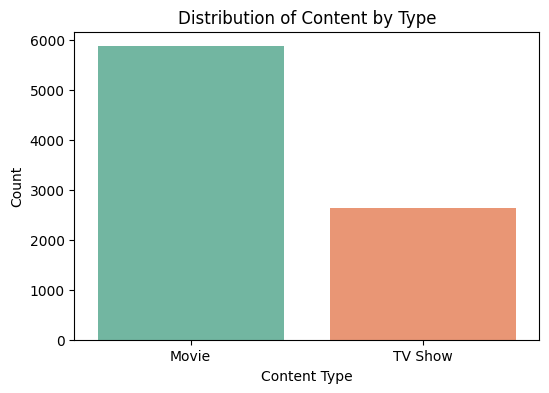

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Distribution of Content by Type")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


**Insights**


*   Movies dominate the platform:

Netflix clearly leans more toward movies than TV shows. The number of movies far exceeds that of series, which suggests a focus on quick, consumable content for viewers.



**2)  Top 10 Countries with Most Content**

<ipython-input-21-1873679520>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


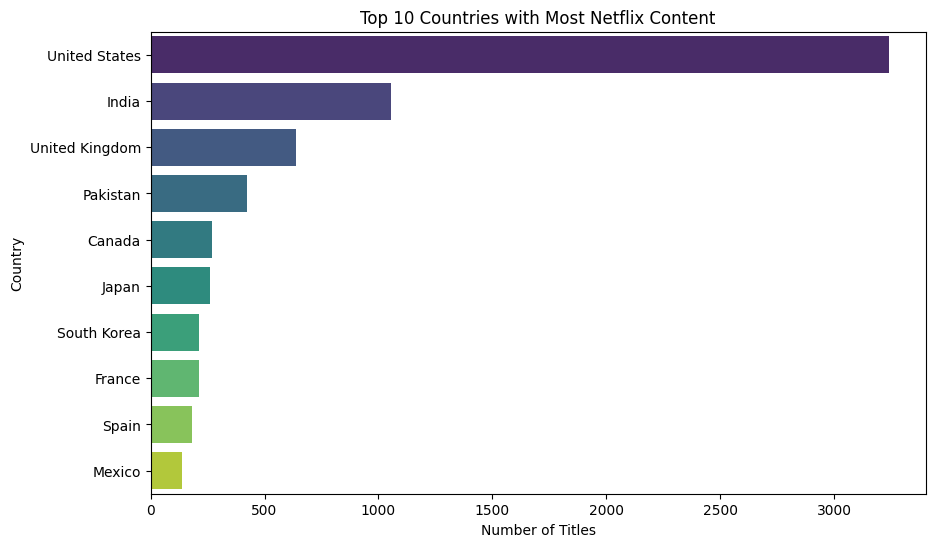

In [21]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


**Insights:**

*   The U.S. leads in content production:

Most of the titles on Netflix come from the United States, followed by India and the UK. This likely reflects both Netflix’s home market and its major content partnerships in those countries.



**3) Most Common Genres**

<ipython-input-22-652357394>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='Set3')


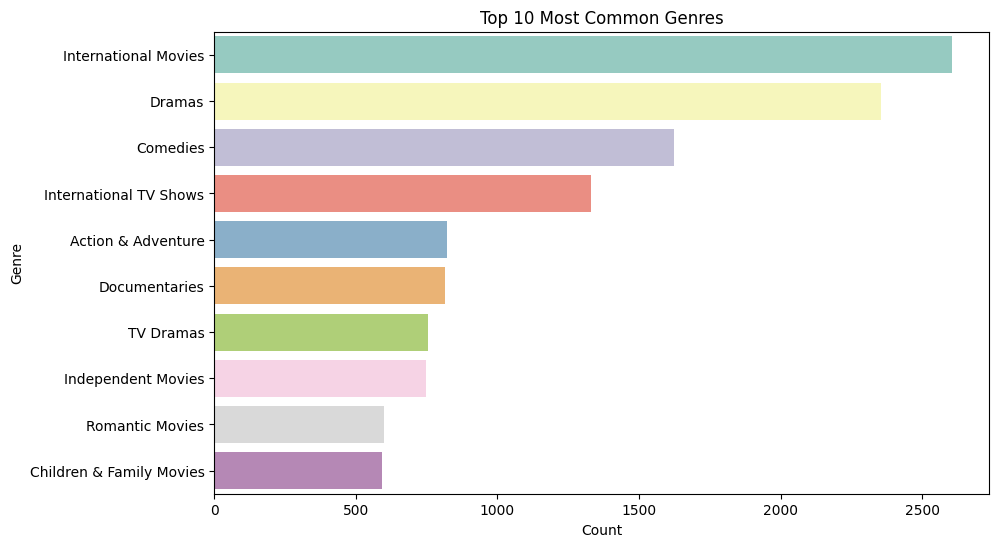

In [22]:
# Split and explode genres
df['genres'] = df['listed_in'].str.split(', ')
genres_exploded = df.explode('genres')
top_genres = genres_exploded['genres'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='Set3')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


**Insights:**

* Genres like Drama and Comedy are most common:

 When it comes to what kind of content is being offered, genres like Drama, Comedy, and International Movies top the list. A single title is often tagged with more than one genre, which helps with discoverability on the platform.



**4) Content Added Over Time (Yearly)**

<ipython-input-23-1099889151>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year_added', order=sorted(df['year_added'].dropna().unique()), palette='coolwarm')


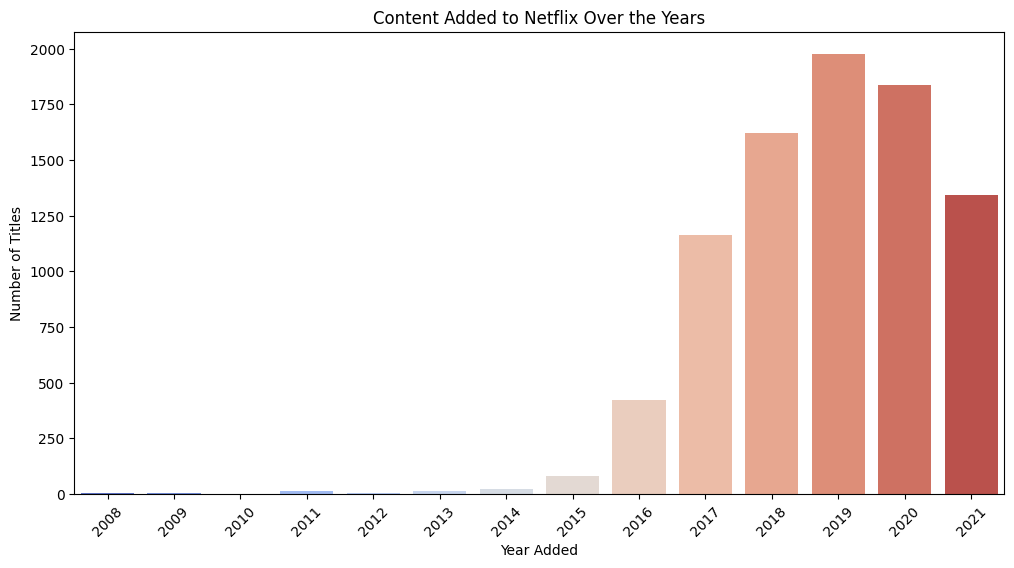

In [23]:
df['year_added'] = df['date_added'].dt.year
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='year_added', order=sorted(df['year_added'].dropna().unique()), palette='coolwarm')
plt.title("Content Added to Netflix Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


**Insights:**

*  Content has grown steadily over the years:

There’s a clear rise in the amount of content added each year, especially from 2016 onwards. The growth peaked around 2019 and 2020, showing Netflix’s push for global expansion and more original content.

**5) Ratings Distribution**

<ipython-input-25-2141026001>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='magma')


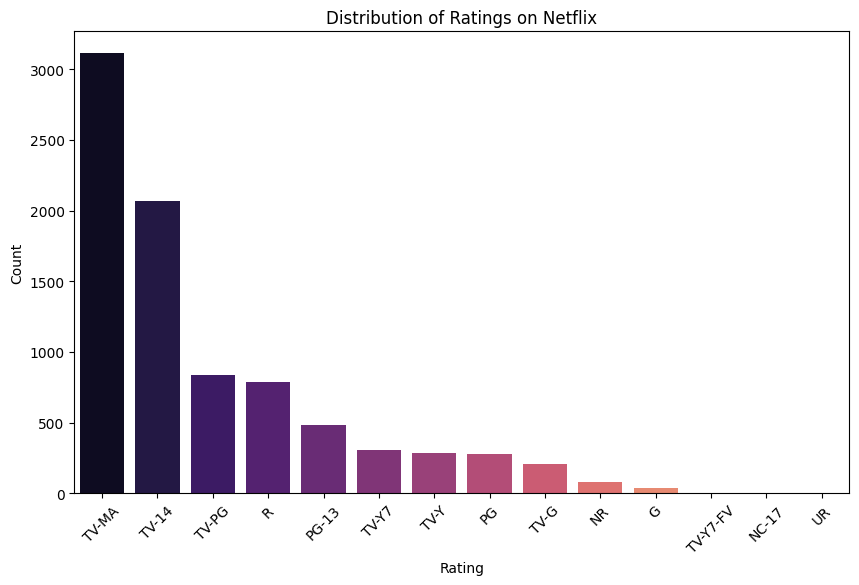

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='magma')
plt.title("Distribution of Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Insights:**

* Most content is geared toward mature audiences:

Ratings like TV-MA and TV-14 are the most frequent, meaning a lot of Netflix content is intended for adults or older teens. Family-friendly content is present but not as dominant.   



**6) Movie Duration Distribution**

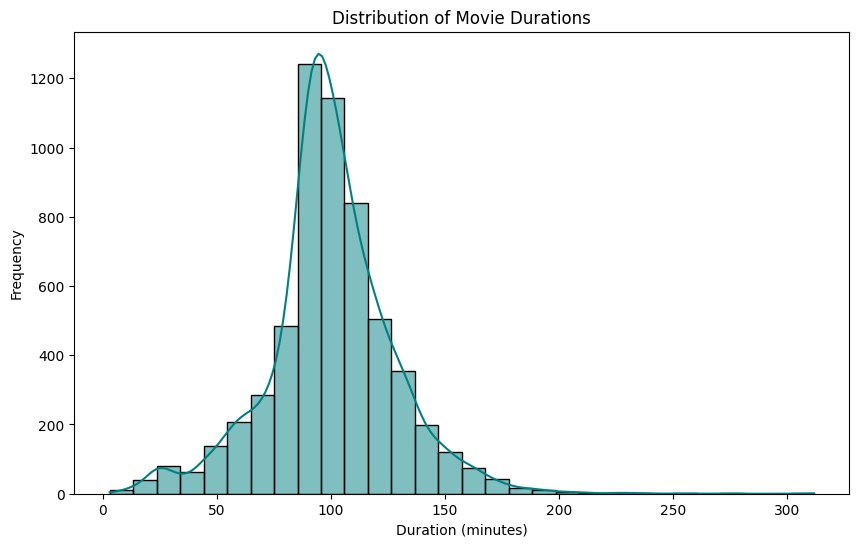

In [26]:
# Filter only movies and extract duration in minutes
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_min'] = df_movies['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,6))
sns.histplot(df_movies['duration_min'], bins=30, kde=True, color='teal')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()


**Insights:**

* Movie lengths follow a standard pattern:

The majority of movies are between 80 and 120 minutes long — pretty standard for feature films. There are some shorter and longer ones, but they’re less common.



**7) Top 10 Directors by Number of Titles**

<ipython-input-27-275108561>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')


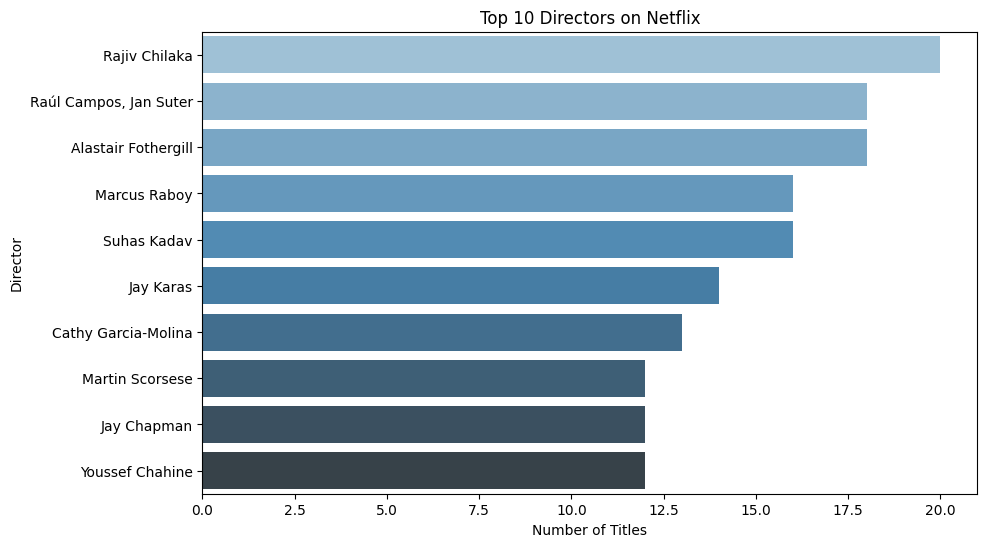

In [27]:
df_directors = df[df['director'] != "Unknown"]
top_directors = df_directors['director'].value_counts().head(10)
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


**Insights:**

*   A few directors stand out — once you remove the noise:

Initially, "Unknown" was listed as the most frequent director, which was just a placeholder. Once we filtered that out, names like Rajiv Chilaka and Alastair Fothergill stood out. These directors are known for children’s content and documentaries, which seem to have a strong presence on the platform.

